In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
#对GPU使用模式进行设置，使其允许内存增长，在程序允许时，根据需要为TensorFlow进程分配GPU显存
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 

In [3]:
mnist = tf.keras.datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [4]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train, X_test = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32)
y_train, y_test = tf.cast(train_y, tf.int16), tf.cast(test_y, tf.int16)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [9]:
model.fit(X_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5517 - sparse_categorical_accuracy: 0.8466 - val_loss: 0.1771 - val_sparse_categorical_accuracy: 0.9513
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1630 - sparse_categorical_accuracy: 0.9529 - val_loss: 0.1364 - val_sparse_categorical_accuracy: 0.9603
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.1070 - sparse_categorical_accuracy: 0.9690 - val_loss: 0.1145 - val_sparse_categorical_accuracy: 0.9672
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0827 - sparse_categorical_accuracy: 0.9769 - val_loss: 0.1002 - val_sparse_categorical_accuracy: 0.9702
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0651 - sparse_categorical_accuracy: 0.9818 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9719


In [10]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0852 - sparse_categorical_accuracy: 0.9737


[0.08523464947938919, 0.9736999869346619]

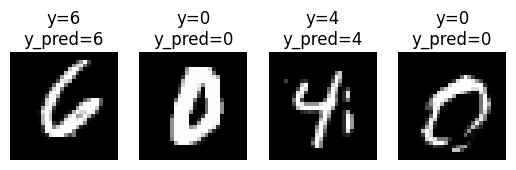

In [21]:
for i in range(4):
    num = np.random.randint(1, 10000)
    
    plt.subplot(1, 4, i + 1)
    plt.axis("off")
    plt.imshow(test_x[num], cmap='gray')
    y_pred=np.argmax(model.predict(tf.constant(X_test[num].numpy().reshape(1,28,28))))
    title="y="+str(test_y[num])+"\ny_pred="+str(y_pred)
    plt.title(title)
plt.show()

In [22]:
model.save("mnist_model.h5")